Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sqlite3
from sqlite3 import Error
import csv
from sqlalchemy import create_engine

In [62]:
#To join the Bike and Foursquare dataframe
bike_df = pd.read_csv("bike.csv")
bike_df
foursquare_df = pd.read_csv('foursquare.csv')
foursquare_df

# Full outer join
df_join = pd.merge(bike_df, foursquare_df, on=['latitude', 'longitude'], how='outer')

In [63]:
df_join

,latitude,longitude,empty_slots,free_bikes,timestamp,last_updated,extra_normal_bikes,extra_ebikes,extra_slots,extra_has_ebikes,total_bike_slots,count_rest,category_mean,closed_bucket_mean
0,49.262487,-123.114397,29,7,2024-05-22T04:41:23.496000Z,1716352493,7,0,36,True,36,50,1.800000,1.340000
1,49.274566,-123.121817,9,7,2024-05-22T04:41:23.483000Z,1716352843,7,0,16,True,16,50,1.960000,1.140000
2,49.279764,-123.110154,20,5,2024-05-22T04:41:23.486000Z,1716352574,4,1,26,True,25,50,2.000000,1.100000
3,49.260599,-123.113504,10,6,2024-05-22T04:41:23.487000Z,1716352405,6,0,16,True,16,50,1.760000,1.380000
4,49.264215,-123.117772,11,4,2024-05-22T04:41:23.501000Z,1716352512,4,0,16,True,15,44,1.750000,1.386364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,49.277773,-123.114237,8,12,2024-05-22T04:41:23.581000Z,1716352558,10,2,20,True,20,50,1.900000,1.100000
248,49.263073,-123.254307,8,12,2024-05-22T04:41:23.481000Z,1716352644,0,12,20,True,20,50,1.780000,1.900000
249,49.259999,-123.250902,20,6,2024-05-22T04:41:23.425000Z,1716352712,1,5,26,True,26,48,1.770833,1.895833
250,49.254780,-123.236210,15,13,2024-05-22T04:41:23.274000Z,1716352799,4,9,28,True,28,10,1.800000,2.300000


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [46]:
# to learn more about my data
df_join.info()
df_join.describe()

# df_join.sort_values('latitide', inplace = True)

#noted that none of the value were null


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            252 non-null    float64
 1   longitude           252 non-null    float64
 2   timestamp           252 non-null    object 
 3   last_updated        252 non-null    int64  
 4   extra_normal_bikes  252 non-null    int64  
 5   extra_ebikes        252 non-null    int64  
 6   extra_slots         252 non-null    int64  
 7   extra_has_ebikes    252 non-null    bool   
 8   total_bike_slots    252 non-null    int64  
 9   count_rest          252 non-null    int64  
 10  category_mean       252 non-null    float64
 11  closed_bucket_mean  252 non-null    float64
dtypes: bool(1), float64(4), int64(6), object(1)
memory usage: 22.0+ KB


,latitude,longitude,last_updated,extra_normal_bikes,extra_ebikes,extra_slots,total_bike_slots,count_rest,category_mean,closed_bucket_mean
count,252.000000,252.000000,2.520000e+02,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,49.271656,-123.120637,1.709532e+09,6.662698,1.698413,18.928571,18.650794,46.583333,1.870338,1.387525
std,0.011706,0.035602,1.081194e+08,3.742897,2.169215,5.426332,5.431673,8.510422,0.157163,0.209140
min,49.238105,-123.254307,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.000000,1.400000,1.080000
25%,49.263200,-123.138446,1.716343e+09,4.000000,0.000000,16.000000,15.000000,49.000000,1.760000,1.220000
50%,49.270975,-123.118155,1.716343e+09,6.000000,1.000000,18.000000,18.000000,50.000000,1.880000,1.380000
75%,49.280475,-123.099747,1.716343e+09,9.000000,2.000000,20.000000,20.250000,50.000000,1.980000,1.502778
max,49.302577,-123.056909,1.716343e+09,20.000000,17.000000,40.000000,40.000000,50.000000,2.363636,2.300000


In [64]:
#using seaborn to show relationship between the number of restaurants and the bikes available

df_join_eda = df_join[['total_bike_slots', 'count_rest', 'extra_normal_bikes', 'extra_slots', 'extra_ebikes', 'category_mean', 'closed_bucket_mean']]
df_join_eda.info()

print(df_join_eda.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_bike_slots    252 non-null    int64  
 1   count_rest          252 non-null    int64  
 2   extra_normal_bikes  252 non-null    int64  
 3   extra_slots         252 non-null    int64  
 4   extra_ebikes        252 non-null    int64  
 5   category_mean       252 non-null    float64
 6   closed_bucket_mean  252 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 13.9 KB
   total_bike_slots  count_rest  extra_normal_bikes  extra_slots  \
0                36          50                   7           36   
1                16          50                   7           16   
2                25          50                   4           26   
3                16          50                   6           16   
4                15          44                   4           16

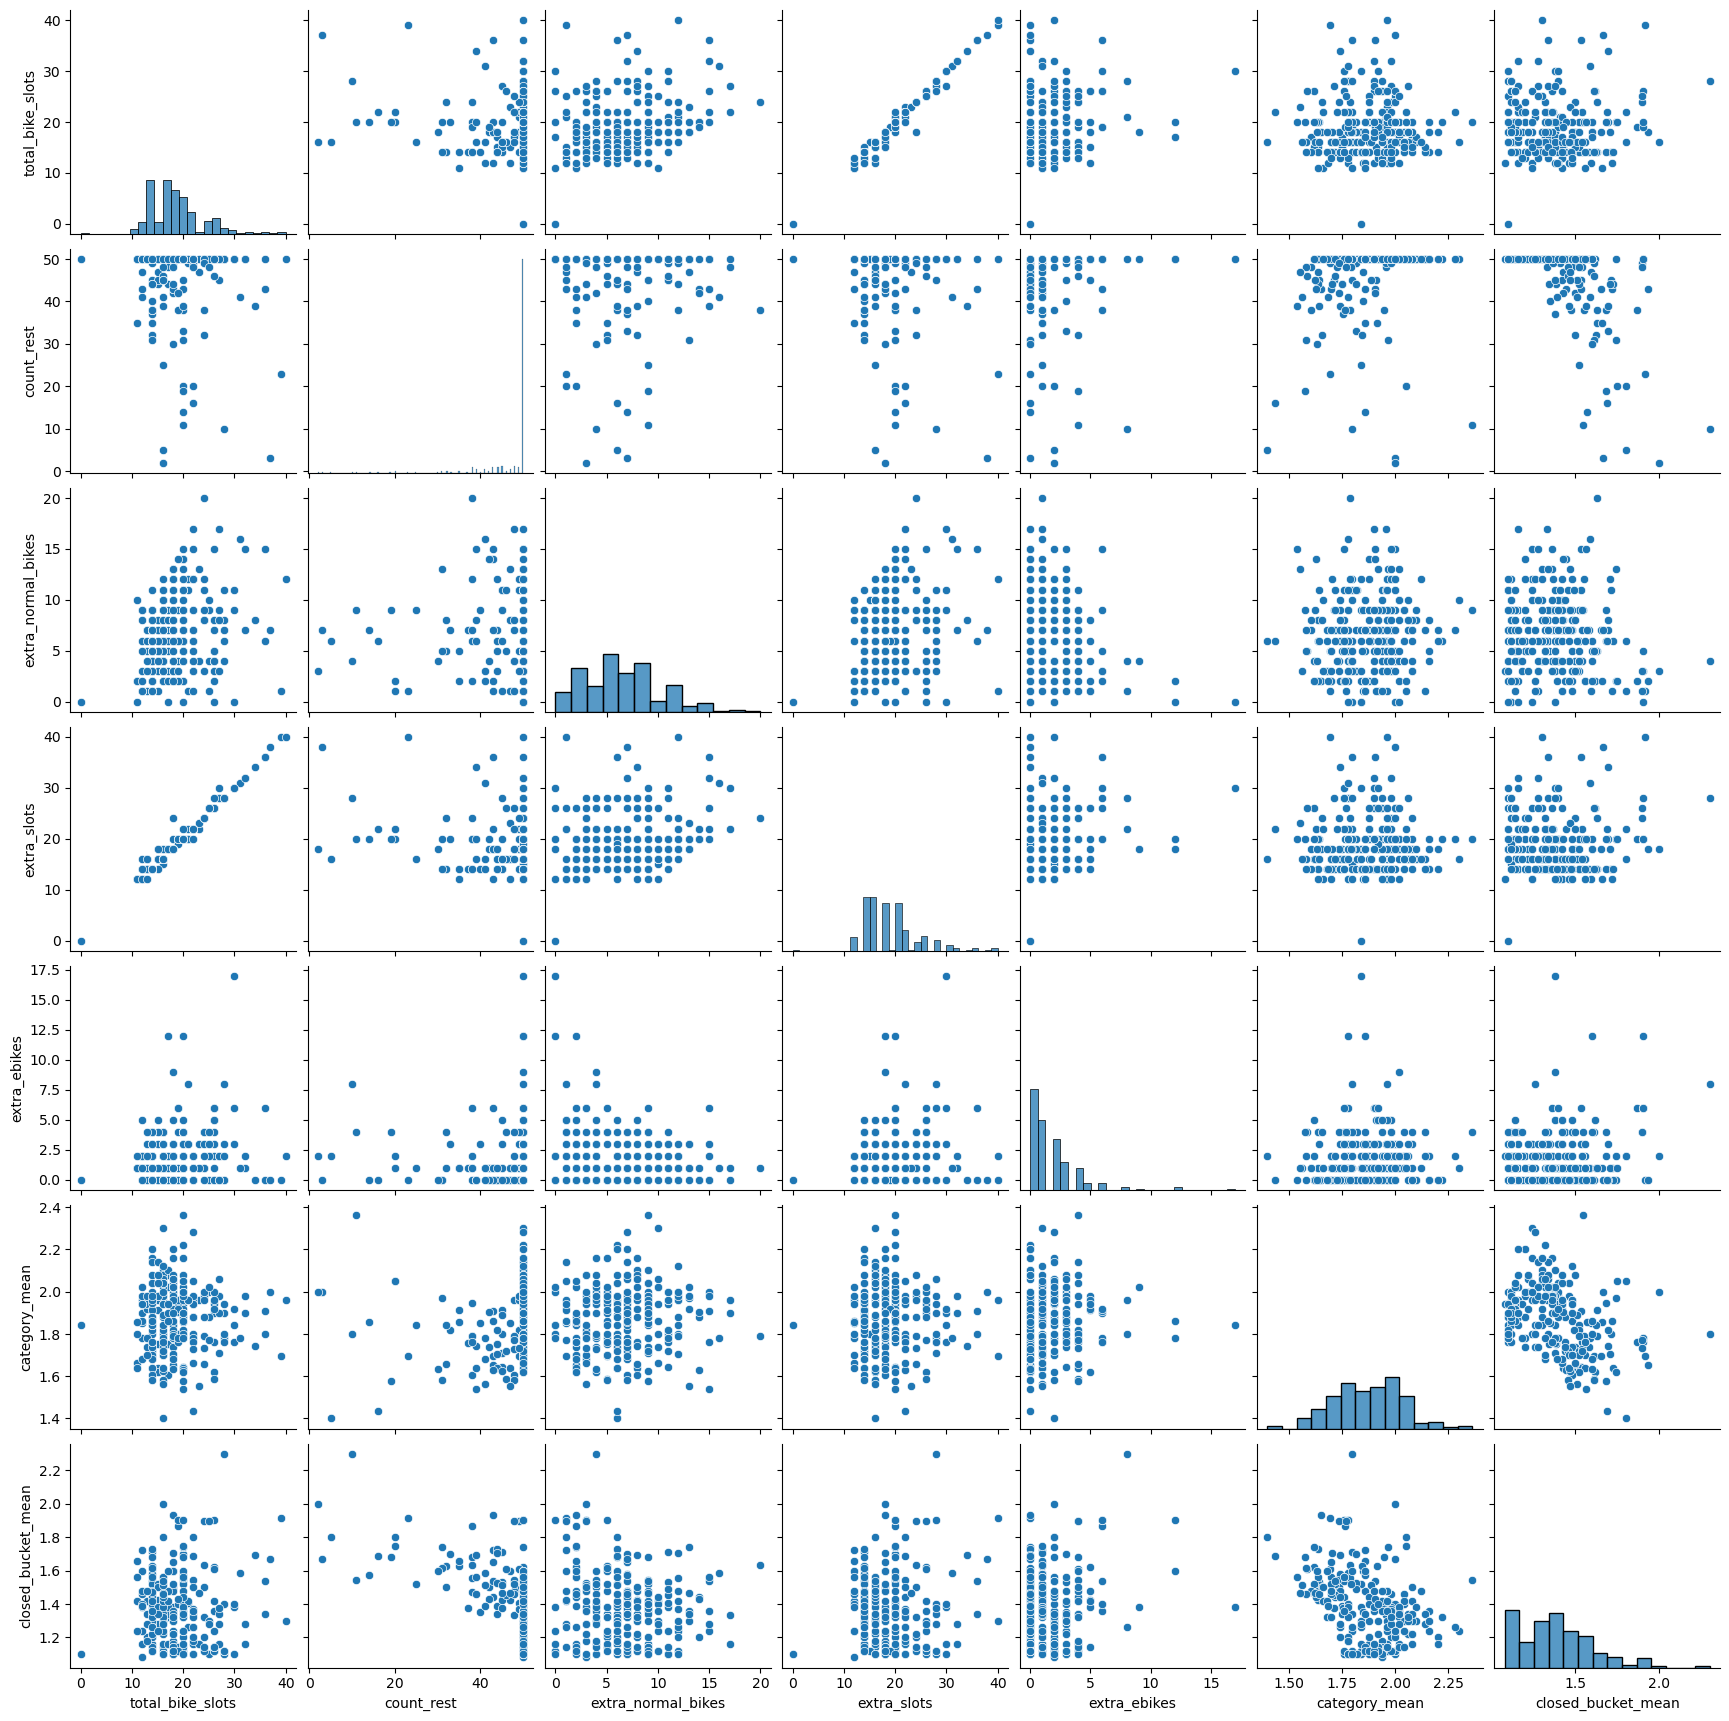

In [52]:
sns.pairplot(df_join_eda)
plt.show()

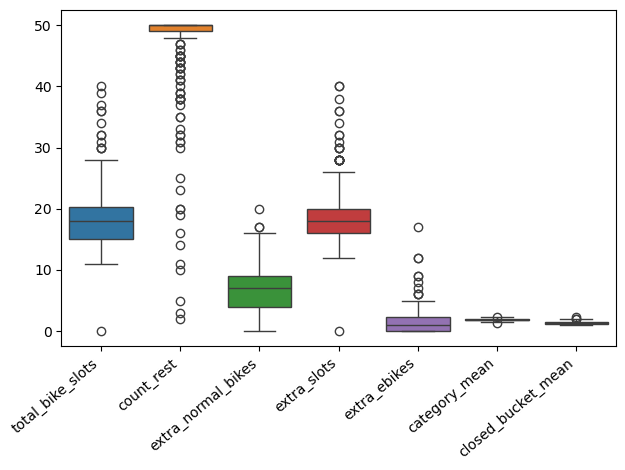

In [65]:
box_plot = sns.boxplot(data=df_join_eda)
plt.xticks(rotation=40, ha="right")
plt.tight_layout()
plt.show()

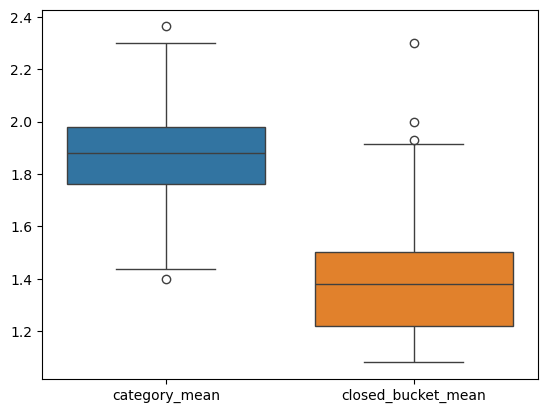

In [66]:
category_bucket = df_join_eda[['category_mean', 'closed_bucket_mean']]
box_plot = sns.boxplot(data=category_bucket)

In [80]:
df_join.to_csv('bikes_foursquare_join.csv', index=False)

Initial pattern or relationship I noticed includes:
1. most bike stations have at least 50 restaurants that are within 1000m away from it.
2. Bike stations that do not have at least 50 stations next to it is considered an outlier
3. The total bike slots available in a bike station has a positive correlation with extra slots in the station
4. On average there are less extra bikes in each station
5. From the pairplot, it looked like category mean and closed bucket mean had similar relationship wit the other variable, tried to see the relationship better with the boxplot and it shows that the have different data. the Closed_bucket_mean seems to be more right skewed

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [85]:
import sqlite3
from sqlite3 import Error
import csv

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

connection = create_connection("sm_app.sqlite")


Connection to SQLite DB successful


In [86]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

In [87]:
import csv
import sqlite3

# Establish connection to SQLite database
connection = sqlite3.connect("project_2.db")
cursor = connection.cursor()

In [88]:
conn = sqlite3.connect('project_2.db')
conn

In [89]:
drop_bike_table = """
DROP TABLE bikes;
"""

drop_foursquare_table = """
DROP TABLE foursquare;
"""

In [90]:
cursor.execute(drop_bike_table)
cursor.execute(drop_foursquare_table)

OperationalError: no such table: bikes

In [91]:
create_bike_table = """
CREATE TABLE IF NOT EXISTS bikes (
  latitude DOUBLE,
  longitude DOUBLE,
  empty_slots INT,
  free_bikes INT,
  total_bike_slots INT,
  PRIMARY KEY (latitude, longitude)
);
"""
create_foursquare_table = """
CREATE TABLE IF NOT EXISTS foursquare(
  Number_Restaurants INT,
  category_mean DOUBLE,
  count_bucket_mean DOUBLE,
  latitude DOUBLE ,
  longitude DOUBLE,
  PRIMARY KEY (latitude, longitude) 
);
""" 


In [92]:
 # Execute table creation queries
cursor.execute(create_bike_table)
cursor.execute(create_foursquare_table)

# Function to insert data from CSV into SQL table
def insert_data_from_csv(csv_file, table_name):
    with open(csv_file, "r", newline="") as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  # Skip header row if it exists
        for row in csv_reader:
            cursor.execute(f"INSERT INTO {table_name} VALUES (?, ?, ?, ?, ?)", row)
    connection.commit()


# Insert data from foursquare.csv into foursquare table
insert_data_from_csv("foursquare.csv", "foursquare")


In [93]:
cursor.execute(create_bike_table)
# Function to insert data from CSV into SQL table
def insert_data_from_csv(csv_file, table_name):
    with open(csv_file, "r", newline="") as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  # Skip header row if it exists
        for row in csv_reader:
            cursor.execute(f"INSERT INTO {table_name} VALUES  (?, ?, ?, ?, ?)", row)
    connection.commit()


# Insert data from bike.csv into bikes table
insert_data_from_csv("bike2.csv", "bikes")

# Close connection
connection.close()

Look at the data before and after the join to validate your data.

In [94]:
connection = create_engine('sqlite:///project_2.db')

# before join
bike_data = '''SELECT * 
                FROM bikes 
                LIMIT 10;'''



bike_df = pd.read_sql_query(bike_data, connection)

bike_df


,latitude,longitude,empty_slots,free_bikes,total_bike_slots
0,49.262487,-123.114397,29,7,36
1,49.274566,-123.121817,9,7,16
2,49.279764,-123.110154,20,5,25
3,49.260599,-123.113504,10,6,16
4,49.264215,-123.117772,11,4,15
5,49.270877,-123.115103,7,6,13
6,49.268930,-123.118130,4,10,14
7,49.271721,-123.104207,13,7,20
8,49.287214,-123.112870,26,0,26
9,49.282409,-123.118541,12,8,20


In [95]:
foursquare_data = '''SELECT * FROM foursquare
                    LIMIT 10;'''
foursquare_df = pd.read_sql_query(foursquare_data, connection)
foursquare_df

,Number_Restaurants,category_mean,count_bucket_mean,latitude,longitude
0,50,1.620000,1.740000,49.238105,-123.154966
1,48,1.729167,1.541667,49.243375,-123.104978
2,14,1.857143,1.571429,49.245135,-123.116098
3,20,2.050000,1.800000,49.245535,-123.120496
4,20,2.050000,1.750000,49.246243,-123.124373
5,50,1.660000,1.500000,49.247204,-123.101549
6,2,2.000000,2.000000,49.247854,-123.153422
7,30,1.633333,1.600000,49.249184,-123.116141
8,50,1.700000,1.480000,49.249722,-123.104991
9,50,1.760000,1.560000,49.250940,-123.101306


In [96]:
#After Join - using inner join
join_bike_foursquare = '''
SELECT f.latitude,
        f.longitude,
        f.Number_Restaurants,
        b.total_bike_slots AS total_slot_in_station

FROM foursquare as f
JOIN bikes as b
ON f.latitude = b.latitude 
AND f.longitude = b.longitude;
'''

join_df = pd.read_sql_query(join_bike_foursquare, connection)
join_df

,latitude,longitude,Number_Restaurants,total_slot_in_station
0,49.238105,-123.154966,50,20
1,49.243375,-123.104978,48,22
2,49.245135,-123.116098,14,20
3,49.245535,-123.120496,20,22
4,49.246243,-123.124373,20,20
...,...,...,...,...
247,49.295340,-123.150433,5,16
248,49.297933,-123.130758,45,20
249,49.298657,-123.121176,11,20
250,49.299292,-123.130281,25,16
